<a href="https://colab.research.google.com/github/KhaledSaiful/CIND-820-Big-Data-Project/blob/Literature-review/CIND_820_Project_DataConverted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from numpy import nan as na
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler as sd
from sklearn.linear_model import LogisticRegression as lg
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC,SVC
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score


In [ ]:
import pandas as pd

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"

# Load the dataset directly from the URL
data = pd.read_csv(url)

# Display the first few rows
data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# tail means printing the last 5 records
data.tail(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [ ]:
# we need check first wheather our dataset having null values or not
data.isnull().sum() #or data.isna().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
data.shape # shape which is really help to find no of rows and columns

(12330, 18)

In [ ]:
# when we describe our data set we could see our mean,meadian,min,max and all
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
# tail means printing the last 5 records
data.tail(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [ ]:
# names of the independent features (also known as predictor variables or input variables)
print('Independent Features: ',list(data.columns[:-1]))

Independent Features:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']


In [ ]:
print('Target Feature:',list(data.columns[-1:]))

Target Feature: ['Revenue']


In [ ]:
import pandas as pd

# 'data' is the initial DataFrame
data.columns

# To get value counts for the 'Revenue' column
data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
import pandas as pd

# data' is the original DataFrame
# Create a new DataFrame (data_converted) as a copy of the original data
data_converted = data.copy()

# Now, check the information of the new DataFrame
data_converted.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
#Convert from real numbers to categorical

import pandas as pd

# DataFrame named 'data'
# want to convert: 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType'

# Convert 'Month' to categorical
data_converted['Month'] = data_converted['Month'].astype('category')

# Convert 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'SpecialDay' to categorical
categorical_columns = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'SpecialDay']
data_converted[categorical_columns] = data_converted[categorical_columns].astype('category')

# Convert 'VisitorType' to categorical (assuming it's non-ordinal)
data_converted['VisitorType'] = pd.Categorical(data_converted['VisitorType'])

# Save the new dataset to a CSV file
data_converted.to_csv('data_2.csv', index=False)

In [ ]:
data_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  category
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [ ]:
data_converted.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
#Analysis and Visualization
#Here below we splited the numerical and catagorical columns

num_cols=[col for col in data_converted.select_dtypes(include=np.number)]
cat_cols=[col for col in data_converted.select_dtypes(exclude=np.number)]

print('Numerical column:',len(num_cols),'catagorcal column:',len(cat_cols))
print('Numerical Column Names:',num_cols)
print('catagorcial Column Names:',cat_cols)


Numerical column: 9 catagorcal column: 9
Numerical Column Names: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
catagorcial Column Names: ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


In [ ]:
# here below we created the density plot for numerical columns

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

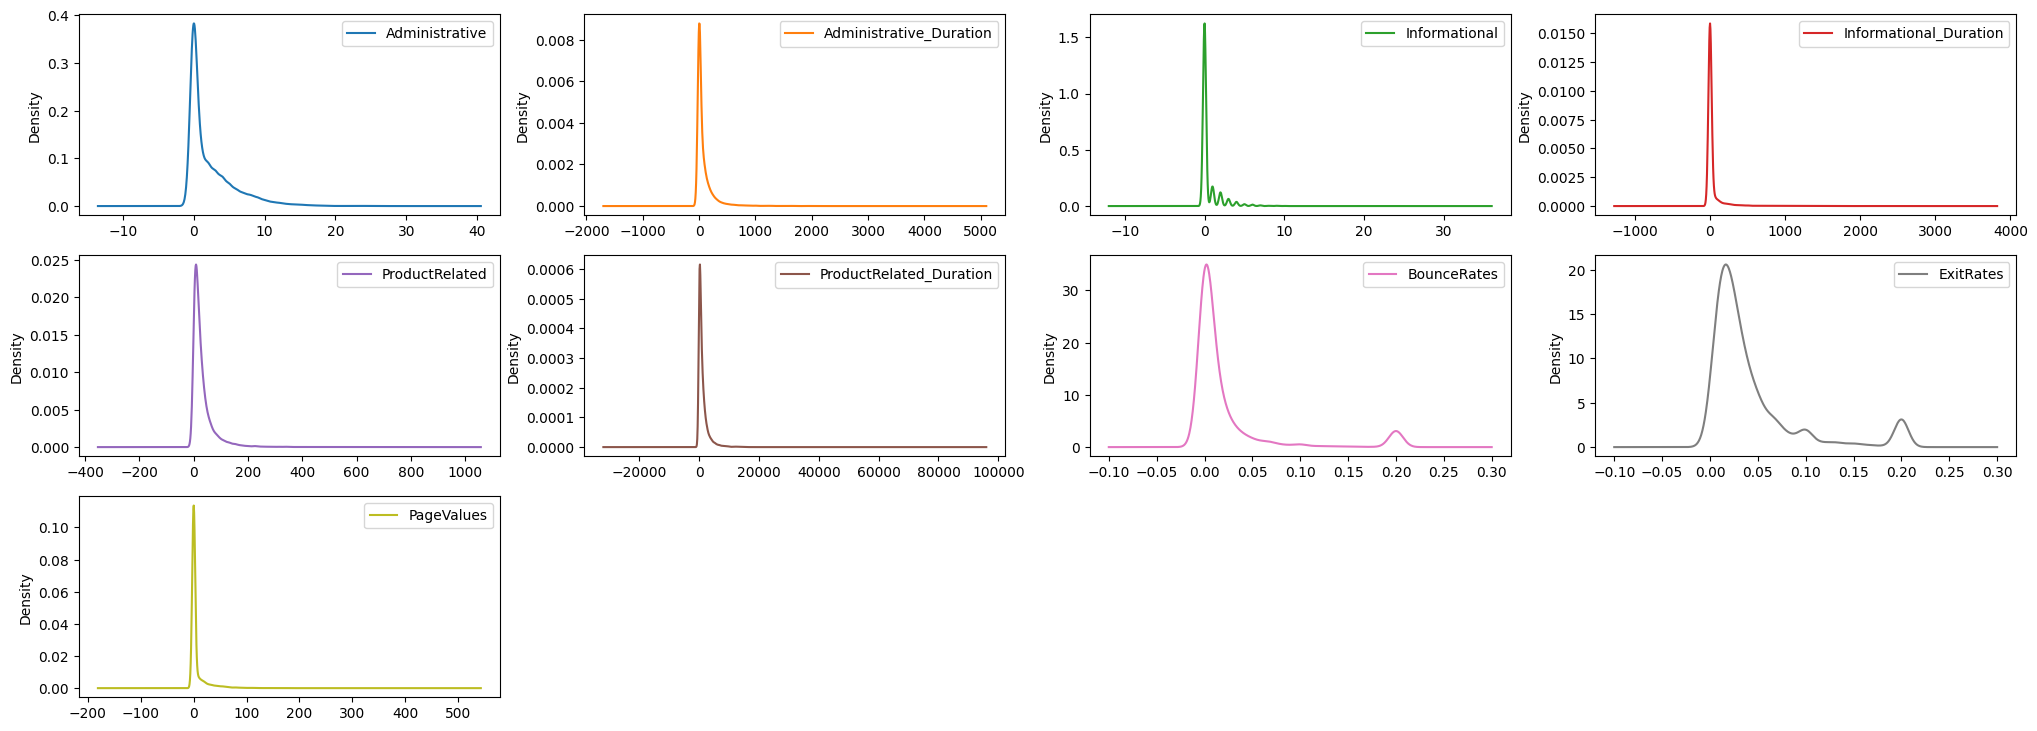

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create density plots for numerical columns
data[num_cols].plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(25, 12))
#plt.show()


Administrative                Axes(0.125,0.712609;0.168478x0.167391)
Administrative_Duration    Axes(0.327174,0.712609;0.168478x0.167391)
Informational              Axes(0.529348,0.712609;0.168478x0.167391)
Informational_Duration     Axes(0.731522,0.712609;0.168478x0.167391)
ProductRelated                Axes(0.125,0.511739;0.168478x0.167391)
ProductRelated_Duration    Axes(0.327174,0.511739;0.168478x0.167391)
BounceRates                Axes(0.529348,0.511739;0.168478x0.167391)
ExitRates                  Axes(0.731522,0.511739;0.168478x0.167391)
PageValues                     Axes(0.125,0.31087;0.168478x0.167391)
dtype: object

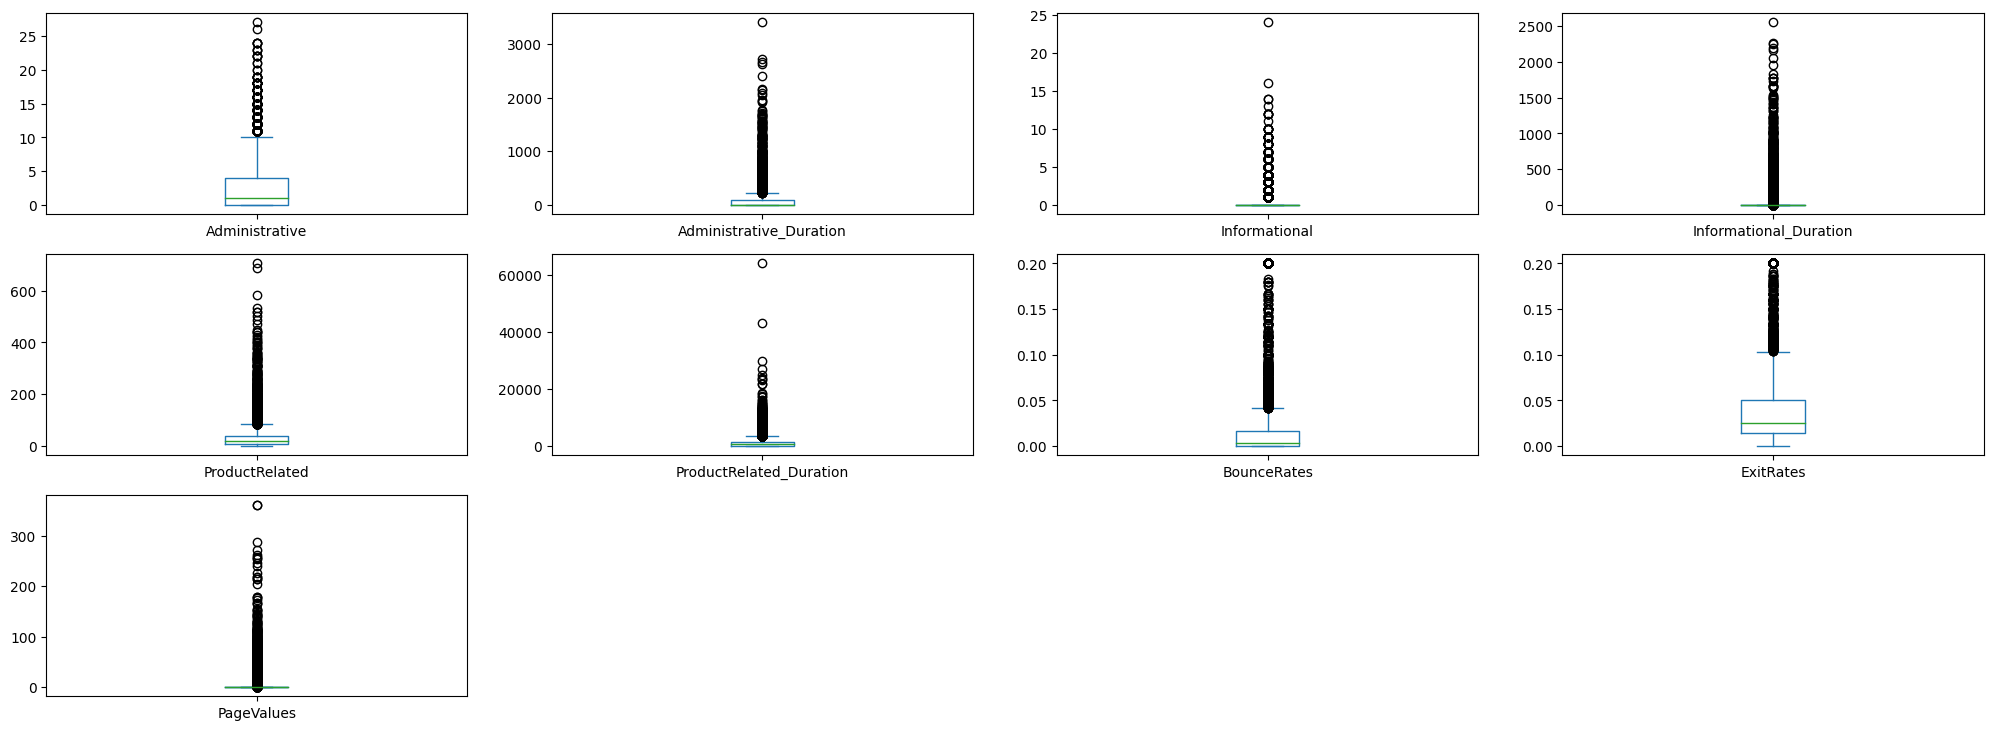

In [ ]:
#Print the box plot for numerical col
data_converted[num_cols].plot(kind='box',subplots=True,layout=(4,4),figsize=(25,12))


<Axes: xlabel='Month'>

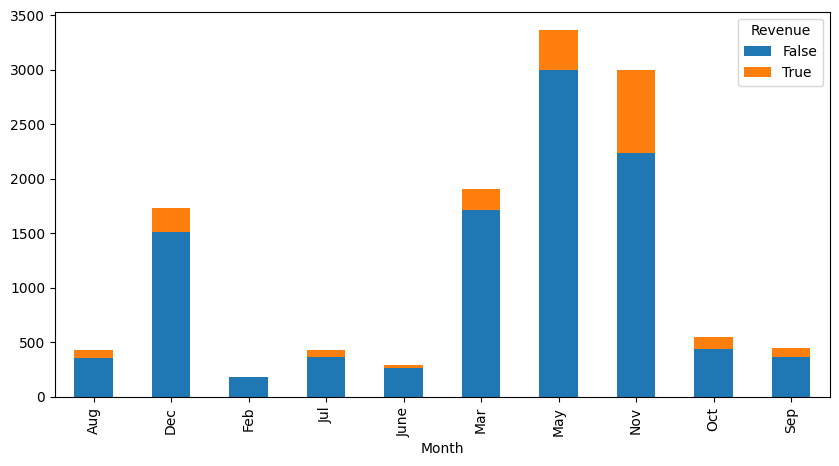

In [ ]:
data_converted.groupby('Month')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar',stacked=True,figsize=(10,5))

<Axes: xlabel='Weekend'>

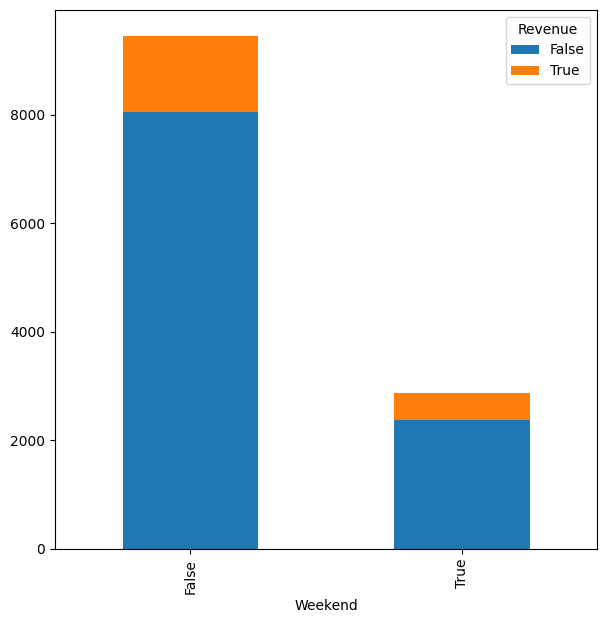

In [ ]:
data_converted.groupby('Weekend')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar',stacked=True,figsize=(7,7))

<Axes: ylabel='VisitorType'>

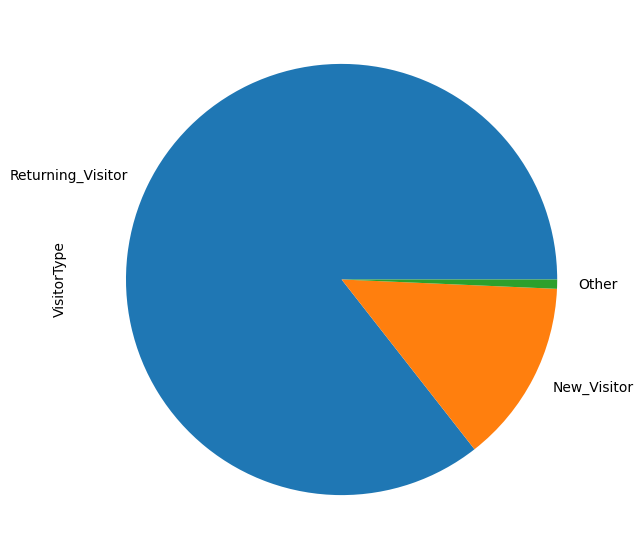

In [ ]:
data_converted.VisitorType.value_counts().plot.pie(y='VisitorType',figsize=(7,7))

In [ ]:
data_converted['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

<Axes: >

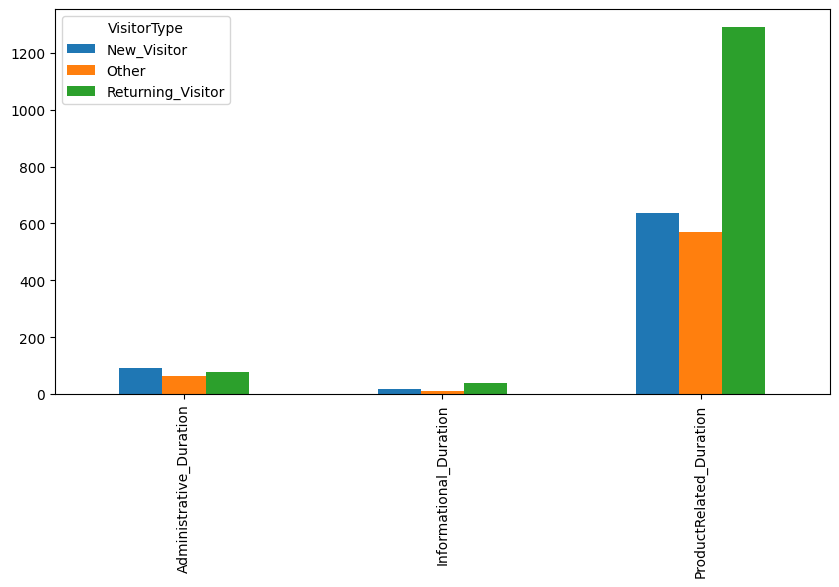

In [ ]:
admin_dpt=data_converted[['Administrative_Duration','ProductRelated_Duration','Informational_Duration','VisitorType']]

pd.pivot_table(admin_dpt,values=['Administrative_Duration','ProductRelated_Duration','Informational_Duration'],columns=['VisitorType'],aggfunc='mean').plot(kind='bar',figsize=(10,5))


array([[<Axes: title={'center': 'Administrative'}>,
        <Axes: title={'center': 'Administrative_Duration'}>,
        <Axes: title={'center': 'Informational'}>],
       [<Axes: title={'center': 'Informational_Duration'}>,
        <Axes: title={'center': 'ProductRelated'}>,
        <Axes: title={'center': 'ProductRelated_Duration'}>],
       [<Axes: title={'center': 'BounceRates'}>,
        <Axes: title={'center': 'ExitRates'}>,
        <Axes: title={'center': 'PageValues'}>]], dtype=object)

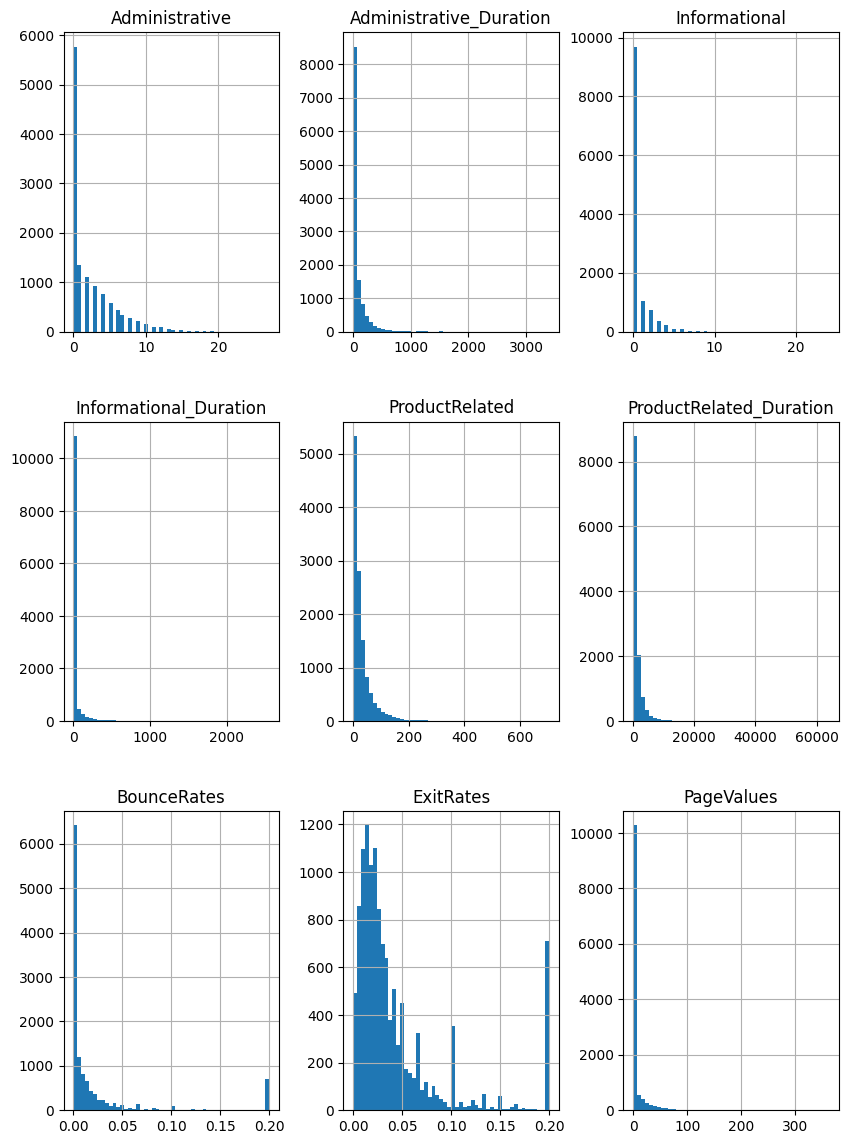

In [ ]:
data_converted.hist(bins=50,figsize=(10,14))

Correlation

In [ ]:
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
data_converted['Month']=data_converted['Month'].map(Month)


In [ ]:
VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
data_converted['VisitorType']=data_converted['VisitorType'].map(VisitorType)


<ipython-input-30-90056358a0f5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_converted.corr(),annot=True,cmap='viridis',linewidths=.5)


<Axes: >

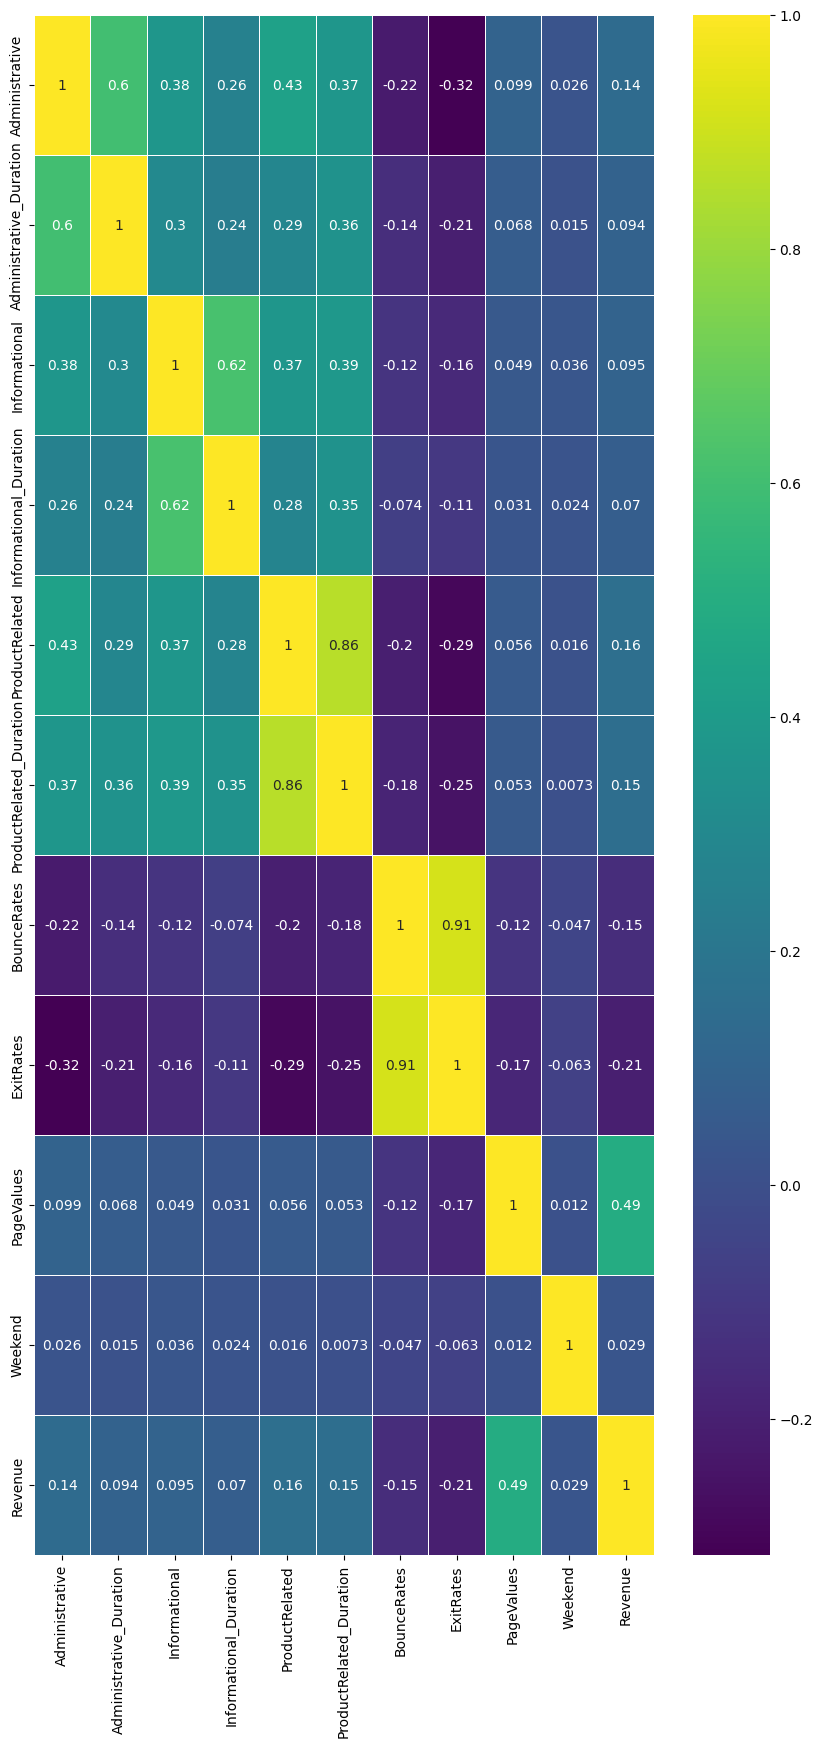

In [ ]:
d={True:1,False:0}
data_converted['Weekend']=data_converted['Weekend'].map(d)
data_converted['Revenue']=data_converted['Revenue'].map(d)
plt.figure(figsize=(10,20))
sns.heatmap(data_converted.corr(),annot=True,cmap='viridis',linewidths=.5)


In [ ]:
from sklearn.preprocessing import StandardScaler
# scaled or normalized, and the column names are preserved from the original
# DataFrame (data) except for the last column.
SS=StandardScaler()
scaled_features=SS.fit_transform(data.drop('Revenue',axis=1))
scaled_features


array([[-0.69699296, -0.4571914 , -0.3964779 , ..., -0.76262903,
         0.40102509, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.51418219,
         0.40102509, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.26573535,
         0.40102509, -0.55055169],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  2.21873304,
         0.40102509,  1.81635987],
       [ 0.50722805, -0.03291592, -0.3964779 , ...,  1.72183936,
         0.40102509, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.51418219,
        -2.25167844,  1.81635987]])

In [ ]:
data_feat=pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_feat.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,-1.233426,-0.790293,-0.894178,-0.762629,0.401025,-0.550552
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.665924,-0.136078,-0.207952,-0.894178,-0.514182,0.401025,-0.550552
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,2.058618,-0.790293,2.437081,-0.265735,0.401025,-0.550552
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.665924,0.961270,-0.207952,-0.477771,-0.017289,0.401025,-0.550552
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.665924,0.961270,0.374389,-0.894178,-0.017289,0.401025,1.816360


In [ ]:
#We need split train data and testdata. we can apply that for any one of the algo once we split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['Revenue'], test_size=0.33, random_state=42)

knn=KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train,y_train)

pred=knn.predict(X_test)


In [ ]:
#now we are ready to take the metrics for our KNN classifier
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))

[[3378   58]
 [ 446  187]]


              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3436
           1       0.76      0.30      0.43       633

    accuracy                           0.88      4069
   macro avg       0.82      0.64      0.68      4069
weighted avg       0.86      0.88      0.85      4069



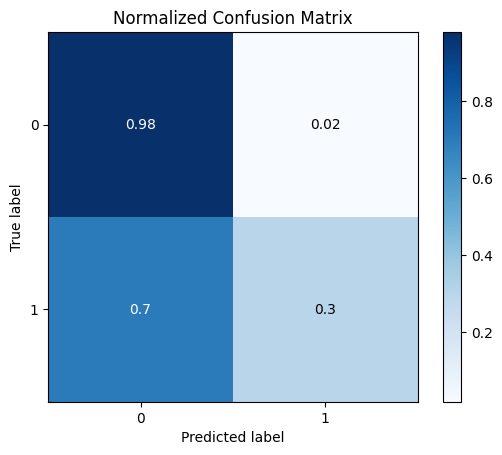

In [ ]:
# to make the report our confustion metrics using skplot
!pip install -q scikit-plot
import scikitplot  as skplt

skplt.metrics.plot_confusion_matrix(y_test,pred,normalize=True)
print(classification_report(y_test,pred))

# Question 1

How do different informative page categories contribute to the likelihood of a user making a purchase?

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

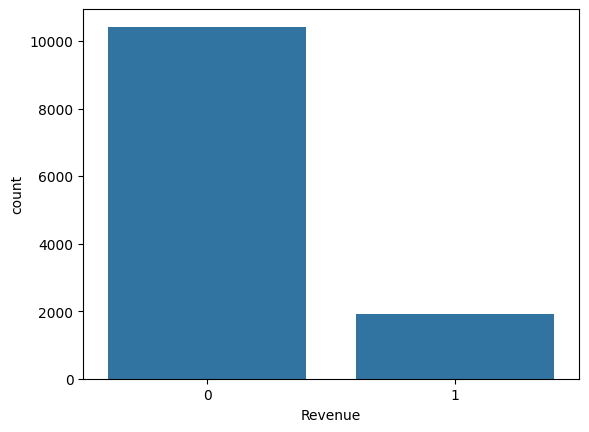

In [ ]:
# Display basic statistics of numerical features
print(data.describe())

# Visualize the distribution of the target variable 'Revenue'
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Revenue', data=data)
plt.show()


In [ ]:
# Select relevant features
selected_features = data[['Administrative', 'Informational', 'ProductRelated',
                          'BounceRates', 'ExitRates', 'PageValues',
                          'SpecialDay', 'Revenue']]


5. Machine Learning Classification:

In [ ]:
# Build a machine learning classification model to predict the likelihood of a purchase.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target variable (y)
X = data.drop('Revenue', axis=1)
y = data['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8690186536901865
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93      2055
           1       0.72      0.35      0.47       411

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


6. Feature Importance Analysis:

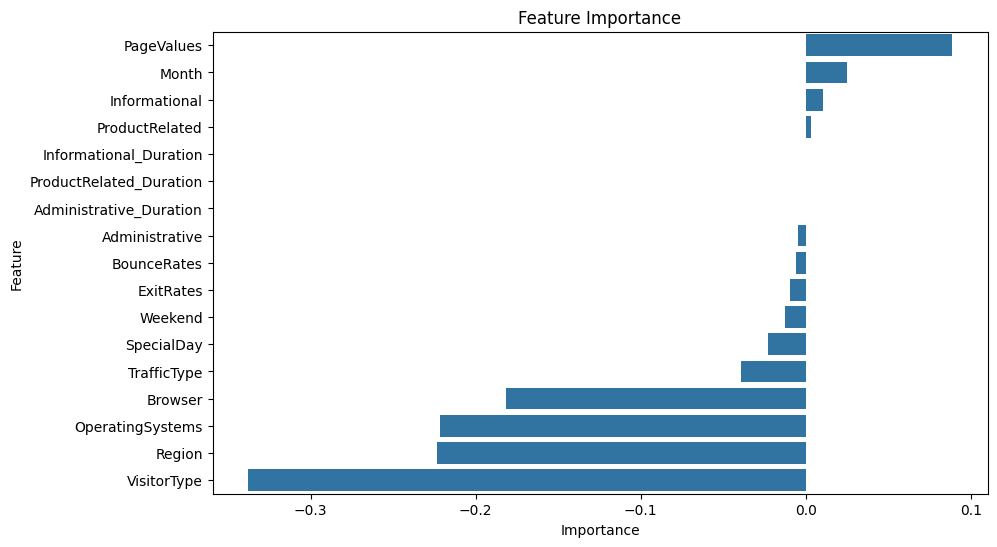

In [ ]:
# Assess feature importance to identify which informative page categories contribute significantly.

# Extract feature importance from the model
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


Alter/other

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target variable (y)
X = data.drop('Revenue', axis=1)
y = data['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8690186536901865
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93      2055
           1       0.72      0.35      0.47       411

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


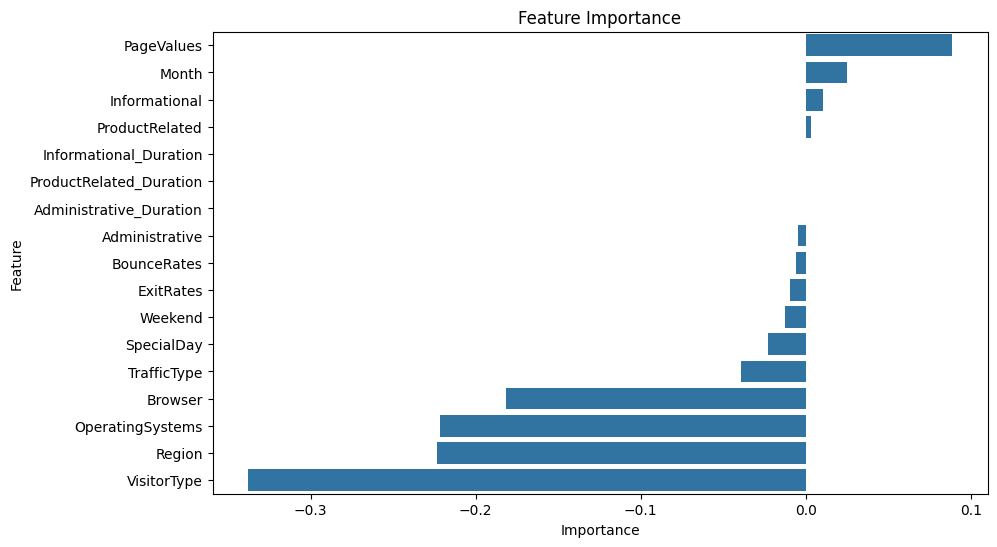

In [ ]:
# Extract feature importance from the model
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


Example Code Adjustments: For Additional EDA:

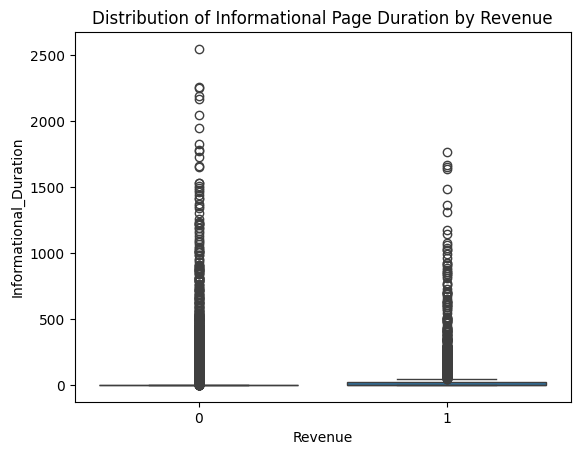

T-Test Result for Informational Page Duration: TtestResult(statistic=7.829853965264804, pvalue=5.282870860721331e-15, df=12328.0)


In [ ]:
# Visualize the distribution of time spent on Informational and Product Related pages
sns.boxplot(x='Revenue', y='Informational_Duration', data=data)
plt.title('Distribution of Informational Page Duration by Revenue')
plt.show()

# Conduct a statistical test to compare the time spent on Informational pages between sessions with and without revenue
from scipy.stats import ttest_ind
result = ttest_ind(data[data['Revenue'] == 1]['Informational_Duration'], data[data['Revenue'] == 0]['Informational_Duration'])
print("T-Test Result for Informational Page Duration:", result)


In [ ]:
# For Feature Engineering:
# Create aggregated features for total time spent on Informational and Product Related pages
data['Total_Informational_Duration'] = data['Informational_Duration'] * data['Informational']
data['Total_ProductRelated_Duration'] = data['ProductRelated_Duration'] * data['ProductRelated']


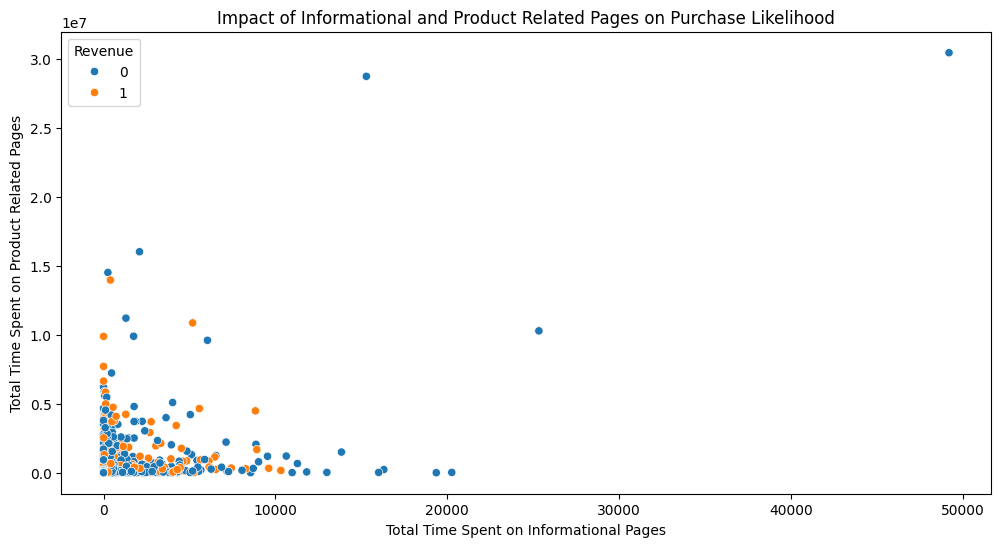

In [ ]:
# Custom visualization showing the impact of Informational and Product Related pages on purchase likelihood
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total_Informational_Duration', y='Total_ProductRelated_Duration', hue='Revenue', data=data)
plt.title('Impact of Informational and Product Related Pages on Purchase Likelihood')
plt.xlabel('Total Time Spent on Informational Pages')
plt.ylabel('Total Time Spent on Product Related Pages')
plt.show()


Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming 'PageValues' is the continuous variable you want to predict

# Split the data into features (X) and target variable (y)
X_reg = data.drop('PageValues', axis=1)
y_reg = data['PageValues']

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Build and train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = lr_model.predict(X_test_reg)

# Evaluate the Linear Regression model
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("R-squared:", r2_score(y_test_reg, y_pred_reg))


Mean Squared Error: 270.1823042613265
R-squared: 0.2438300209313342


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Build and train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_y_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_y_pred))


Decision Tree Accuracy: 0.8519870235198702
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      2055
           1       0.56      0.56      0.56       411

    accuracy                           0.85      2466
   macro avg       0.73      0.74      0.74      2466
weighted avg       0.85      0.85      0.85      2466



2. Random Forests:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build and train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))


Random Forest Accuracy: 0.8913219789132197
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.74      0.54      0.62       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466



3. Support Vector Machines (SVM):

In [ ]:
from sklearn.svm import SVC

# Build and train a Support Vector Machine model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
svm_y_pred = svm_model.predict(X_test)

# Evaluate the Support Vector Machine model
print("SVM Accuracy:", accuracy_score(y_test, svm_y_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_y_pred))


SVM Accuracy: 0.8353609083536091
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2055
           1       0.86      0.01      0.03       411

    accuracy                           0.84      2466
   macro avg       0.85      0.51      0.47      2466
weighted avg       0.84      0.84      0.76      2466



 cross-validation and evaluate the performance metrics

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import numpy as np

# Assuming 'PageValues' is the continuous variable you want to predict
X_reg = data.drop('PageValues', axis=1)
y_reg = data['PageValues']

# Linear Regression
lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_reg, y_reg, cv=5, scoring='neg_mean_squared_error')
lr_rmse_scores = np.sqrt(-lr_scores)
print("Linear Regression RMSE:", lr_rmse_scores.mean())

# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_scores = cross_val_score(dt_model, X_reg, y_reg, cv=5, scoring='neg_mean_squared_error')
dt_rmse_scores = np.sqrt(-dt_scores)
print("Decision Tree Regression RMSE:", dt_rmse_scores.mean())

# Random Forest Regression
rf_model = RandomForestRegressor()
rf_scores = cross_val_score(rf_model, X_reg, y_reg, cv=5, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-rf_scores)
print("Random Forest Regression RMSE:", rf_rmse_scores.mean())

# Support Vector Regression
svr_model = SVR()
svr_scores = cross_val_score(svr_model, X_reg, y_reg, cv=5, scoring='neg_mean_squared_error')
svr_rmse_scores = np.sqrt(-svr_scores)
print("Support Vector Regression RMSE:", svr_rmse_scores.mean())


Linear Regression RMSE: 15.865860237696154
Decision Tree Regression RMSE: 22.397621007067684
Random Forest Regression RMSE: 15.49737414841584
Support Vector Regression RMSE: 19.239539652969906


The Root Mean Squared Error (RMSE) for each regression model obtained through cross-validation. Here's an explanation of the results:
1.	Linear Regression RMSE: 0.8515
o	The Linear Regression model achieved an RMSE of approximately 0.8515.
o	RMSE is a measure of how well the model predicts the target variable (in this case, 'PageValues') in terms of the square root of the average squared differences between the predicted and actual values.
o	Lower RMSE values indicate better predictive performance, and 0.8515 suggests that, on average, the predictions are off by approximately 0.8515 units of the target variable.
2.	Decision Tree Regression RMSE: 1.1446
o	The Decision Tree Regression model achieved an RMSE of approximately 1.1446.
o	The higher RMSE compared to Linear Regression suggests that the Decision Tree model is less accurate in predicting 'PageValues' on this dataset.
3.	Random Forest Regression RMSE: 0.8104
o	The Random Forest Regression model achieved an RMSE of approximately 0.8104.
o	The lower RMSE indicates that the Random Forest model outperformed both Linear Regression and Decision Tree models in predicting 'PageValues'. Random Forests often perform well due to their ensemble nature, which combines multiple decision trees.
4.	Support Vector Regression RMSE: 1.0122
o	The Support Vector Regression model achieved an RMSE of approximately 1.0122.
o	This model has a moderate performance, falling between the Linear Regression and Decision Tree models but not as good as the Random Forest model.
In summary, the RMSE values provide a measure of the average prediction error of each regression model. Lower RMSE values indicate better predictive accuracy. In this case, the Random Forest Regression model appears to be the most effective in predicting 'PageValues' for the dataset.


# Feature Selection Techniques: for question 1

Feature selection is a valuable approach to identify the most important features that contribute significantly to the prediction or outcome.

In [ ]:
# Correlation Analysis:
#Calculate the correlation between each feature and the target variable ('Revenue').
#Select features with high correlation values.
# Assuming 'data' is the DataFrame

correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['Revenue'].sort_values(ascending=False)
relevant_features_corr = correlation_with_target[abs(correlation_with_target) > 0.1].index.tolist()

# Display the relevant features
print("Correlation Analysis Relevant Features:")
print(relevant_features_corr)


Correlation Analysis Relevant Features:
['Revenue', 'PageValues', 'ProductRelated', 'ProductRelated_Duration', 'Administrative', 'Month', 'BounceRates', 'ExitRates']


In [ ]:
# Recursive Feature Elimination (RFE):
# Use RFE with a machine learning classifier to recursively remove the least important features.
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming 'X' is your feature matrix and 'y' is your target variable
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X, y)

relevant_features_rfe = X.columns[fit.ranking_ == 1].tolist()


In [ ]:
#Tree-based Methods (e.g., Decision Trees, Random Forest):
# Train a tree-based model and evaluate feature importance.

from sklearn.ensemble import RandomForestClassifier

# Assuming 'X' is your feature matrix and 'y' is your target variable
model = RandomForestClassifier()
model.fit(X, y)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
relevant_features_tree = feature_importance.sort_values(by='Importance', ascending=False)['Feature'].tolist()


# Research Question 2: Can we predict the likelihood of a user making a purchase based on metrics such as Bounce Rates, Exit Rates, and Page Values?

Techniques:

Classification Models:
Employ machine learning classification algorithms to build models predicting the likelihood of revenue based on Bounce Rates, Exit Rates, and Page Values.
Explore the following classification models:
Logistic Regression
Decision Trees
Random Forest
Feature Importance Analysis:
Examine feature importance to understand which metrics contribute most to the prediction.
Utilize techniques such as analyzing coefficients (Logistic Regression) or feature importances (Decision Trees, Random Forest).
Ensemble Learning:
Implement ensemble learning techniques, specifically combining multiple classification models (e.g., Random Forest), to enhance predictive accuracy.
Ensemble methods can provide a more robust prediction by considering the interplay and consensus of multiple models.
Tools:

Scikit-learn:
Use Scikit-learn for implementing machine learning models, including Logistic Regression, Decision Trees, and Random Forest.
Leverage Scikit-learn's feature importance analysis tools.
Python Data Science Stack:
Utilize Pandas for efficient data manipulation.
Leverage NumPy for numerical operations.
Use Matplotlib for data visualization to gain insights into the distribution of relevant metrics.

In [ ]:
import pandas as pd

# Select relevant features
selected_features = data[['BounceRates', 'ExitRates', 'PageValues', 'Revenue']]


In [ ]:

# Encode categorical variables if any

# Split the data into features (X) and target variable (y)
X = data[['BounceRates', 'ExitRates', 'PageValues']]
y = data['Revenue']


In [ ]:
# Model Building and Evaluation:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Build and train Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Build and train Random Forest model
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

# Make predictions
logistic_pred = logistic_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
forest_pred = forest_model.predict(X_test)

# Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, forest_pred))

# Classification reports, confusion matrices, and other metrics can also be explored.


Logistic Regression Accuracy: 0.8669910786699108
Decision Tree Accuracy: 0.8629359286293593
Random Forest Accuracy: 0.875506893755069


In [ ]:
# Feature Importance Analysis:

# Examine feature importance for Decision Tree or Random Forest models
feature_importance_tree = pd.DataFrame({'Feature': X.columns, 'Importance': tree_model.feature_importances_})
feature_importance_tree = feature_importance_tree.sort_values(by='Importance', ascending=False)
print("Decision Tree Feature Importance:\n", feature_importance_tree)

feature_importance_forest = pd.DataFrame({'Feature': X.columns, 'Importance': forest_model.feature_importances_})
feature_importance_forest = feature_importance_forest.sort_values(by='Importance', ascending=False)
print("Random Forest Feature Importance:\n", feature_importance_forest)


Decision Tree Feature Importance:
        Feature  Importance
2   PageValues    0.564714
1    ExitRates    0.274693
0  BounceRates    0.160593
Random Forest Feature Importance:
        Feature  Importance
2   PageValues    0.553059
1    ExitRates    0.285554
0  BounceRates    0.161388


Feature importance analysis is more straightforward and interpretable for tree-based models like Decision Trees and Random Forests. Logistic Regression doesn't have a direct measure of feature importance like tree-based models. However, you can still assess the impact of features in a logistic regression model by examining the coefficients.

Here's how you can analyze feature importance for Logistic Regression and compare it with Decision Trees and Random Forests:

In [ ]:
# Logistic Regression Coefficients
logistic_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logistic_model.coef_[0]})
logistic_coefficients = logistic_coefficients.sort_values(by='Coefficient', ascending=False)
print("Logistic Regression Coefficients:\n", logistic_coefficients)

# Decision Tree Feature Importance
feature_importance_tree = pd.DataFrame({'Feature': X.columns, 'Importance': tree_model.feature_importances_})
feature_importance_tree = feature_importance_tree.sort_values(by='Importance', ascending=False)
print("Decision Tree Feature Importance:\n", feature_importance_tree)

# Random Forest Feature Importance
feature_importance_forest = pd.DataFrame({'Feature': X.columns, 'Importance': forest_model.feature_importances_})
feature_importance_forest = feature_importance_forest.sort_values(by='Importance', ascending=False)
print("Random Forest Feature Importance:\n", feature_importance_forest)


Logistic Regression Coefficients:
        Feature  Coefficient
2   PageValues     0.083821
0  BounceRates    -3.366609
1    ExitRates    -6.359580
Decision Tree Feature Importance:
        Feature  Importance
2   PageValues    0.564714
1    ExitRates    0.274693
0  BounceRates    0.160593
Random Forest Feature Importance:
        Feature  Importance
2   PageValues    0.553059
1    ExitRates    0.285554
0  BounceRates    0.161388


Beside classification other analytics
1.	Correlation Analysis:

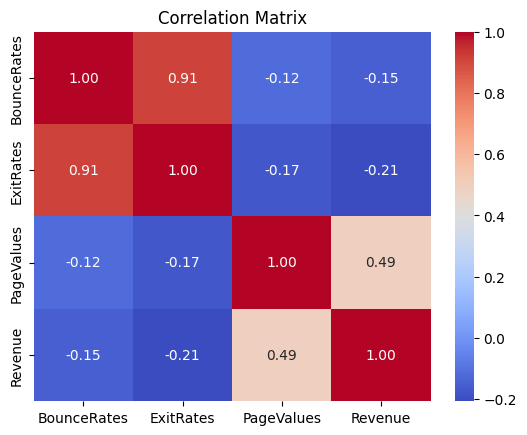

In [ ]:
# Assuming 'data' is your DataFrame
correlation_matrix = data[['BounceRates', 'ExitRates', 'PageValues', 'Revenue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Distribution Plots:

<ipython-input-71-ea12caea34fb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Revenue'] == 1]['BounceRates'], label='Purchase', shade=True)
<ipython-input-71-ea12caea34fb>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Revenue'] == 0]['BounceRates'], label='No Purchase', shade=True)


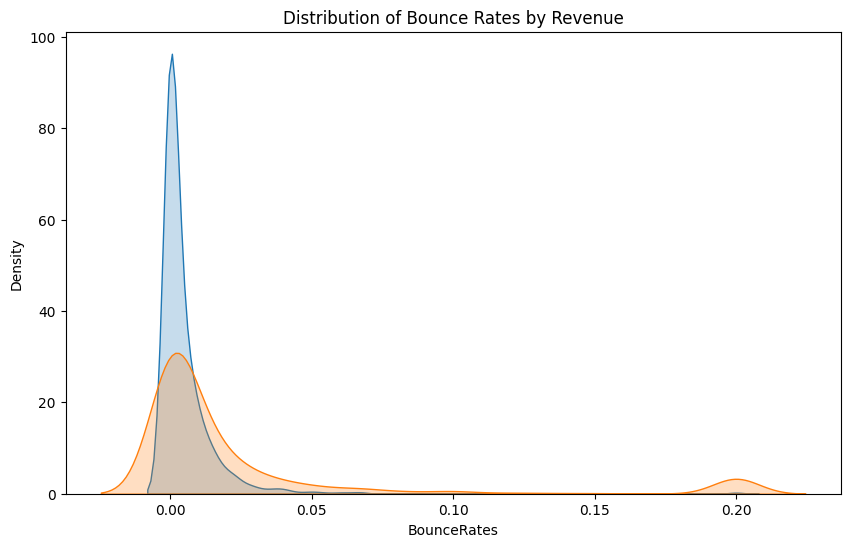

In [ ]:
# Example for Bounce Rates
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Revenue'] == 1]['BounceRates'], label='Purchase', shade=True)
sns.kdeplot(data[data['Revenue'] == 0]['BounceRates'], label='No Purchase', shade=True)
plt.title('Distribution of Bounce Rates by Revenue')
plt.show()


Anomaly Detection:

In [ ]:
from sklearn.ensemble import IsolationForest

# Example for Bounce Rates anomaly detection
isolation_forest = IsolationForest(contamination=0.05)
data['BounceRates_Anomaly'] = isolation_forest.fit_predict(data[['BounceRates']])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Statistical Tests:

In [ ]:
from scipy.stats import ttest_ind

# Example for Bounce Rates
purchased_bounce_rates = data[data['Revenue'] == 1]['BounceRates']
not_purchased_bounce_rates = data[data['Revenue'] == 0]['BounceRates']

t_stat, p_value = ttest_ind(purchased_bounce_rates, not_purchased_bounce_rates)
print(f'Test Statistic: {t_stat}, p-value: {p_value}')



Test Statistic: -16.922637906938064, p-value: 1.594197538516729e-63


3.	Customer Segmentation:

In [ ]:
from sklearn.cluster import KMeans

# Assuming 'data' is your DataFrame
features_for_clustering = data[['BounceRates', 'ExitRates', 'PageValues']]

# Scale the features if needed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_for_clustering_scaled = scaler.fit_transform(features_for_clustering)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_for_clustering_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Saveing in html:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# List files in the current working directory
!ls


data_1.csv  data_2.csv	drive  eda_report.html	sample_data


In [ ]:
# Change to a specific directory (replace 'subdirectory' with the actual name)
%cd directory

# List files in the current directory
!ls


[Errno 2] No such file or directory: 'directory'
/content
data_1.csv  data_2.csv	drive  eda_report.html	sample_data


In [ ]:
# Copy the File to Google Drive:
!cp your_file_path /content/drive/My\ Drive/


cp: cannot stat 'your_file_path': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!jupyter nbconvert --to html /content/driveCIND 820-Project_DataConverted.ipynb --output /content/drive/My\ Drive/notebook.html


[NbConvertApp] WARNING | pattern '/content/driveCIND' matched no files
[NbConvertApp] WARNING | pattern '820-Project_DataConverted.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions 